In [11]:
import os, sys
sys.path.append('/Users/premyslciompa/Documents/Projekty/SciApp/python')

from funkce import *
from zobrazovaci_funkce import *
import pandas
import pymongo

client = pymongo.MongoClient()
db = client.MyDb
dataCollection = db.Data

import bson
import pickle
import time
import math

from concurrent.futures import ThreadPoolExecutor
pool = ThreadPoolExecutor()

import matplotlib

%matplotlib inline

import scipy.stats

In [2]:
def show_measurement_gratings_trans(values, options):
    
    font = {'size': 13, 'weight': 'normal'}

    matplotlib.rc('font', **font)
    
    fig2 = plt.figure(14, figsize=(6.75, 5.55))
    plt.title("Specular transmission")
    plt.plot(wv_array, values[:, 2, 0], 'r--', label='Ts - model')
    plt.plot(wv_array, values[:, 3, 0], 'b--', label='Tp - model')
    plt.plot(measured_points, measured_trans_s/100, 'r-', label='Ts - measurement')
    plt.plot(measured_points, measured_trans_p/100, 'b-', label='Tp - measurement')
    plt.xlabel(options['dependence']['label'])
    max = np.array([values[:, 2, 0], values[:, 3, 0]]).max()
    plt.axis([options['divisions_start'], options['divisions_end'], 0, 1.4 * max])
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    fig4 = plt.figure(15, figsize=(6.75, 5.55))
    plt.title("1 order reflection")
    plt.plot(wv_array, values[:, 0, 1], 'r--', label='Rs - model')
    plt.plot(wv_array, values[:, 1, 1], 'b--', label='Rp - model')
    plt.plot(wv_array, values[:, 1, 2], 'r-', label='Rp - model')
    plt.plot(wv_array, values[:, 1, 2], 'b-', label='Rp - model')
   # max = np.array([values[:, 0, 0], values[:, 1, 0]]).max()
    plt.axis([options['divisions_start'], options['divisions_end'], 0, 0.4])
    plt.xlabel(options['dependence']['label'])
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    fig5 = plt.figure(15, figsize=(6.75, 5.55))
    plt.title("2 order reflection")
    plt.plot(wv_array, values[:, 0, 3], 'r--', label='Rs - model')
    plt.plot(wv_array, values[:, 1, 3], 'b--', label='Rp - model')
    plt.plot(wv_array, values[:, 1, 4], 'r-', label='Rp - model')
    plt.plot(wv_array, values[:, 1, 4], 'b-', label='Rp - model')
   # max = np.array([values[:, 0, 0], values[:, 1, 0]]).max()
    plt.axis([options['divisions_start'], options['divisions_end'], 0, 0.4])
    plt.xlabel(options['dependence']['label'])
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def show_measurement_gratings_ref_back(values, options):
    
    font = {'size': 13, 'weight': 'normal'}

    matplotlib.rc('font', **font)
    
    fig3 = plt.figure(15, figsize=(6.75, 5.55))
    plt.title("Specular reflection")
    plt.plot(wv_array, values[:, 0, 0], 'r--', label='Rs - model')
    plt.plot(wv_array, values[:, 1, 0], 'b--', label='Rp - model')
    plt.plot(measured_points, measured_ref_s_back/100, 'r-', label='Rs - measurement')
    plt.plot(measured_points, measured_ref_p_back/100, 'b-', label='Rp - measurement')
   # max = np.array([values[:, 0, 0], values[:, 1, 0]]).max()
    plt.axis([options['divisions_start'], options['divisions_end'], 0, 0.4])
    plt.xlabel(options['dependence']['label'])
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    fig4 = plt.figure(15, figsize=(6.75, 5.55))
    plt.title("1 order reflection")
    plt.plot(wv_array, values[:, 0, 1], 'r--', label='Rs - model')
    plt.plot(wv_array, values[:, 1, 1], 'b--', label='Rp - model')
    plt.plot(wv_array, values[:, 1, 2], 'r-', label='Rp - model')
    plt.plot(wv_array, values[:, 1, 2], 'b-', label='Rp - model')
   # max = np.array([values[:, 0, 0], values[:, 1, 0]]).max()
    plt.axis([options['divisions_start'], options['divisions_end'], 0, 0.4])
    plt.xlabel(options['dependence']['label'])
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    fig5 = plt.figure(15, figsize=(6.75, 5.55))
    plt.title("2 order reflection")
    plt.plot(wv_array, values[:, 0, 3], 'r--', label='Rs - model')
    plt.plot(wv_array, values[:, 1, 3], 'b--', label='Rp - model')
    plt.plot(wv_array, values[:, 1, 4], 'r-', label='Rp - model')
    plt.plot(wv_array, values[:, 1, 4], 'b-', label='Rp - model')
   # max = np.array([values[:, 0, 0], values[:, 1, 0]]).max()
    plt.axis([options['divisions_start'], options['divisions_end'], 0, 0.4])
    plt.xlabel(options['dependence']['label'])
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
def show_measurement_gratings_trans_back(values, options):
    
    font = {'size': 13, 'weight': 'normal'}

    matplotlib.rc('font', **font)
    
    fig2 = plt.figure(14, figsize=(6.75, 5.55))
    plt.title("Specular transmission")
    plt.plot(wv_array, values[:, 2, 0], 'r--', label='Ts - model')
    plt.plot(wv_array, values[:, 3, 0], 'b--', label='Tp - model')
    plt.plot(measured_points, measured_trans_s_back/100, 'r-', label='Ts - measurement')
    plt.plot(measured_points, measured_trans_p_back/100, 'b-', label='Tp - measurement')
    plt.xlabel(options['dependence']['label'])
    max = np.array([values[:, 2, 0], values[:, 3, 0]]).max()
    plt.axis([options['divisions_start'], options['divisions_end'], 0, 1.4 * max])
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    fig4 = plt.figure(15, figsize=(6.75, 5.55))
    plt.title("1 order reflection")
    plt.plot(wv_array, values[:, 0, 1], 'r--', label='Rs - model')
    plt.plot(wv_array, values[:, 1, 1], 'b--', label='Rp - model')
    plt.plot(wv_array, values[:, 1, 2], 'r-', label='Rp - model')
    plt.plot(wv_array, values[:, 1, 2], 'b-', label='Rp - model')
   # max = np.array([values[:, 0, 0], values[:, 1, 0]]).max()
    plt.axis([options['divisions_start'], options['divisions_end'], 0, 0.4])
    plt.xlabel(options['dependence']['label'])
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    fig5 = plt.figure(15, figsize=(6.75, 5.55))
    plt.title("2 order reflection")
    plt.plot(wv_array, values[:, 0, 3], 'r--', label='Rs - model')
    plt.plot(wv_array, values[:, 1, 3], 'b--', label='Rp - model')
    plt.plot(wv_array, values[:, 1, 4], 'r-', label='Rp - model')
    plt.plot(wv_array, values[:, 1, 4], 'b-', label='Rp - model')
   # max = np.array([values[:, 0, 0], values[:, 1, 0]]).max()
    plt.axis([options['divisions_start'], options['divisions_end'], 0, 0.4])
    plt.xlabel(options['dependence']['label'])
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def show_measurement_gratings_ref(values, options):
    
    font = {'size': 13, 'weight': 'normal'}

    matplotlib.rc('font', **font)
    
    fig3 = plt.figure(15, figsize=(6.75, 5.55))
    plt.title("Specular reflection")
    plt.plot(wv_array, values[:, 0, 0], 'r--', label='Rs - model')
    plt.plot(wv_array, values[:, 1, 0], 'b--', label='Rp - model')
   # max = np.array([values[:, 0, 0], values[:, 1, 0]]).max()
    plt.axis([options['divisions_start'], options['divisions_end'], 0, 0.8])
    plt.xlabel(options['dependence']['label'])
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    fig4 = plt.figure(15, figsize=(6.75, 5.55))
    plt.title("1 order reflection")
    plt.plot(wv_array, values[:, 0, 1], 'r--', label='Rs - model')
    plt.plot(wv_array, values[:, 1, 1], 'b--', label='Rp - model')
    plt.plot(wv_array, values[:, 0, 2], 'r-', label='Rp - model')
    plt.plot(wv_array, values[:, 1, 2], 'b-', label='Rp - model')
   # max = np.array([values[:, 0, 0], values[:, 1, 0]]).max()
    plt.axis([options['divisions_start'], options['divisions_end'], 0, 0.35])
    plt.xlabel(options['dependence']['label'])
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    fig5 = plt.figure(15, figsize=(6.75, 5.55))
    plt.title("2 order reflection")
    plt.plot(wv_array, values[:, 0, 3], 'r--', label='Rs - model')
    plt.plot(wv_array, values[:, 1, 3], 'b--', label='Rp - model')
    plt.plot(wv_array, values[:, 0, 4], 'r-', label='Rp - model')
    plt.plot(wv_array, values[:, 1, 4], 'b-', label='Rp - model')
   # max = np.array([values[:, 0, 0], values[:, 1, 0]]).max()
    plt.axis([options['divisions_start'], options['divisions_end'], 0, 0.15])
    plt.xlabel(options['dependence']['label'])
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Coherent

/Users/premyslciompa/miniconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


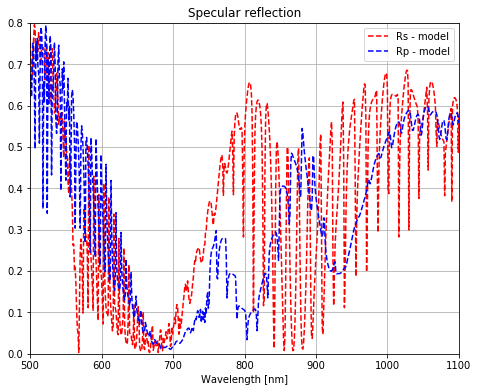

CPU times: user 2min 5s, sys: 865 ms, total: 2min 6s
Wall time: 1min 4s
Parser   : 133 ms


In [25]:
%%time

def general_func_temp(wvs, options_input, angle):
    
    def get_structure_and_options(index):
        
        options = {
            'bound_selectors': [
                ['wavelength'],  # Select the proper attribute to be dependant
            ],
            'n_terms': 10,
            'n_select': 0,
            'wavelength': wvs[index],
            'angle': angle,
            'divisions': options_input['divisions'],
            'divisions_start': options_input['divisions_start'],
            'divisions_end': options_input['divisions_end'],
            'dependence': options_input['dependence']
        }

        fill_grating = 0.5
        
        width_grating = 530
        width_ref_vrstva = 20
       
        perm_substrate = 1.5**2
        perm_ref_vrstva = (1 - 6j)**2
        
        structure = {
            'bound_selectors': [
            ],
            'superstrate': 1,  # indexes, not perm
            'substrate': 1,
            'period': 1500,
            'data': [
                 {'width': width_ref_vrstva, 'periodic': True, 'coherent': True, 'materials': [
                    {'permittivity': [perm_ref_vrstva, 0, 0, 0, perm_ref_vrstva, 0, 0, 0,  perm_ref_vrstva], 'start': 0,
                     'stop': fill_grating},
                    {'permittivity': [1, 0, 0, 0, 1, 0, 0, 0, 1], 'start': fill_grating, 'stop': 1},
                ]},
                 {'width': width_grating-width_ref_vrstva, 'periodic': True, 'coherent': True, 'materials': [
                    {'permittivity': [perm_substrate, 0, 0, 0, perm_substrate, 0, 0, 0,  perm_substrate], 'start': 0,
                     'stop': fill_grating},
                    {'permittivity': [1, 0, 0, 0, 1, 0, 0, 0, 1], 'start': fill_grating, 'stop': 1},
                ]},
                {'width': width_ref_vrstva, 'periodic': True, 'coherent': True, 'materials': [
                    {'permittivity': [perm_substrate, 0, 0, 0, perm_substrate, 0, 0, 0,  perm_substrate], 'start': 0,
                     'stop': fill_grating},
                    {'permittivity': [perm_ref_vrstva, 0, 0, 0, perm_ref_vrstva, 0, 0, 0, perm_ref_vrstva], 'start': fill_grating, 'stop': 1},
                ]},
                {'width': 10000, 'periodic': False, 'coherent': True,
                 'permittivity': [ perm_substrate, 0, 0, 0,  perm_substrate, 0, 0, 0,  perm_substrate]},
                 
            ]}
        
        return options, structure

    def calculate_from_structure_and_options(index):
        options, structure = get_structure_and_options(index)
        coherent_subsystems = get_coherent_subsets(structure)
        
        for item in coherent_subsystems:
            item['toeplitz_matrix'] = calculate_toeplitz_matrices(item, options)
            # Ke kazde podstrukture pridam jeji vypocitanou s-matici
            item['s_matrix'] = calculate_s_matrix(item, options, item['toeplitz_matrix'])

        # Pomoci partial waves algorithm vypocitam vysledne koherencni matice
        coh_matrices = calculate_incoherent_partial_waves(coherent_subsystems, options)

        reflectance_s, reflectance_p, transmittance_s, transmittance_p, diff_angles = get_observables(coh_matrices,
                                                                                                      options, structure)
        # Z vypocitanych matic ziskam potrebne veliciny a vratim je
        return {'coefficients': np.array([reflectance_s, reflectance_p, transmittance_s, transmittance_p]),
                        'diff_angles': diff_angles, 'structure': structure}
    
    indexes = range(wvs.size)
    results = list(map(calculate_from_structure_and_options,indexes))
    

    return get_coeffs(np.array(results))[0]

n_points = 600
wv_array = np.linspace(500, 1100,n_points)
options_input = {
    'divisions': wv_array.size,
    'divisions_start': wv_array[0],
    'divisions_end': wv_array[-1],
    'dependence': {
        'name': 'wavelength',  ##angle // wavelength // structure
        'label': 'Wavelength [nm]'
    }
}

values = general_func_temp(wv_array, options_input, 0)

fig3 = plt.figure(15, figsize=(6.75, 5.55))
plt.title("Specular reflection")
plt.plot(wv_array, values[:,0,0], 'r--', label='Rs - model')
plt.plot(wv_array, values[:,1,0], 'b--', label='Rp - model')
plt.axis([options_input['divisions_start'], options_input['divisions_end'], 0, 0.8])
plt.xlabel(options_input['dependence']['label'])
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Angle average

/Users/premyslciompa/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:94: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/premyslciompa/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:95: ComplexWarning: Casting complex values to real discards the imaginary part


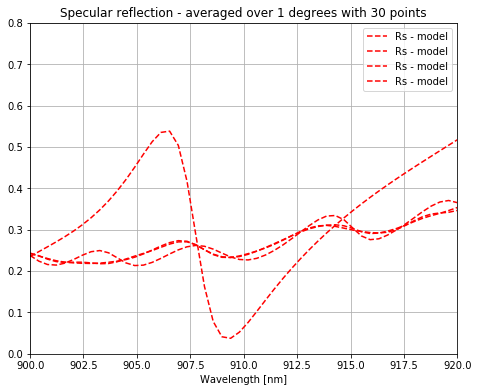

CPU times: user 11min 8s, sys: 4.95 s, total: 11min 13s
Wall time: 5min 46s


In [21]:
%%time

def general_func_angle(wvs, options_input, angle):
    
    def get_structure_and_options(index):
        
        options = {
            'bound_selectors': [
                ['wavelength'],  # Select the proper attribute to be dependant
            ],
            'n_terms': 10,
            'n_select': 2,
            'wavelength': wvs[index],
            'angle': angle,
            'divisions': options_input['divisions'],
            'divisions_start': options_input['divisions_start'],
            'divisions_end': options_input['divisions_end'],
            'dependence': options_input['dependence']
        }

        fill_grating = 0.5
        
        width_grating = 530
        width_ref_vrstva = 20
       
        perm_substrate = 1.5**2
        perm_ref_vrstva = (1 - 6j)**2
        
        structure = {
            'bound_selectors': [
            ],
            'superstrate': 1,  # indexes, not perm
            'substrate': 1,
            'period': 1500,
            'data': [
                 {'width': width_ref_vrstva, 'periodic': True, 'coherent': True, 'materials': [
                    {'permittivity': [perm_ref_vrstva, 0, 0, 0, perm_ref_vrstva, 0, 0, 0,  perm_ref_vrstva], 'start': 0,
                     'stop': fill_grating},
                    {'permittivity': [1, 0, 0, 0, 1, 0, 0, 0, 1], 'start': fill_grating, 'stop': 1},
                ]},
                 {'width': width_grating-width_ref_vrstva, 'periodic': True, 'coherent': True, 'materials': [
                    {'permittivity': [perm_substrate, 0, 0, 0, perm_substrate, 0, 0, 0,  perm_substrate], 'start': 0,
                     'stop': fill_grating},
                    {'permittivity': [1, 0, 0, 0, 1, 0, 0, 0, 1], 'start': fill_grating, 'stop': 1},
                ]},
                {'width': width_ref_vrstva, 'periodic': True, 'coherent': True, 'materials': [
                    {'permittivity': [perm_substrate, 0, 0, 0, perm_substrate, 0, 0, 0,  perm_substrate], 'start': 0,
                     'stop': fill_grating},
                    {'permittivity': [perm_ref_vrstva, 0, 0, 0, perm_ref_vrstva, 0, 0, 0, perm_ref_vrstva], 'start': fill_grating, 'stop': 1},
                ]},
                {'width': 10000, 'periodic': False, 'coherent': True,
                 'permittivity': [ perm_substrate, 0, 0, 0,  perm_substrate, 0, 0, 0,  perm_substrate]},
                 
            ]}
        
        return options, structure

    def calculate_from_structure_and_options(index):
        options, structure = get_structure_and_options(index)
        coherent_subsystems = get_coherent_subsets(structure)
        
        for item in coherent_subsystems:
            item['toeplitz_matrix'] = calculate_toeplitz_matrices(item, options)
            # Ke kazde podstrukture pridam jeji vypocitanou s-matici
            item['s_matrix'] = calculate_s_matrix(item, options, item['toeplitz_matrix'])

        # Pomoci partial waves algorithm vypocitam vysledne koherencni matice
        coh_matrices = calculate_incoherent_partial_waves(coherent_subsystems, options)

        reflectance_s, reflectance_p, transmittance_s, transmittance_p, diff_angles = get_observables(coh_matrices,
                                                                                                      options, structure)
        # Z vypocitanych matic ziskam potrebne veliciny a vratim je
        return {'coefficients': np.array([reflectance_s, reflectance_p, transmittance_s, transmittance_p]),
                        'diff_angles': diff_angles, 'structure': structure}
    
    indexes = range(wvs.size)
    results = list(map(calculate_from_structure_and_options,indexes))
    

    return get_coeffs(np.array(results))[0]


def angle_avg(angle_diff, angle_avg_points):
    list_angle_avg = []
    weighted_points = np.linspace(-3*angle_diff,3*angle_diff, angle_avg_points)
    weights = scipy.stats.norm.pdf(weighted_points,0,angle_diff)/scipy.stats.norm.pdf(weighted_points,0,angle_diff).sum()
    
    for x in range(angle_avg_points):
        list_angle_avg.append(weights[x]*general_func_angle(wv_array, options_input, weighted_points[x]))
    
    rs_0 = np.empty((angle_avg_points,len(wv_array)))
    rp_0 = np.empty((angle_avg_points,len(wv_array)))

    for x in range(angle_avg_points):
        rs_0[x] = list_angle_avg[x][:,0,0]
        rp_0[x] = list_angle_avg[x][:,1,0]
        
    fig3 = plt.figure(15, figsize=(6.75, 5.55))
    plt.title("Specular reflection - averaged over " + str(angle_diff) + ' degrees with ' + str(angle_avg_points) + ' points')
    plt.plot(wv_array, rs_0.sum(axis=0), 'r--', label='Rs - model')
    #plt.plot(wv_array, rp_0.sum(axis=0), 'b--', label='Rp - model')
    plt.axis([options_input['divisions_start'], options_input['divisions_end'], 0, 0.8])
    plt.xlabel(options_input['dependence']['label'])
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    return rs_0.mean(axis=0), rp_0.mean(axis=0) 

values_angle_avg_02 = angle_avg(0.0001,1)
values_angle_avg_02 = angle_avg(1,10)
values_angle_avg_02 = angle_avg(1,20)
values_angle_avg_02 = angle_avg(1,30)
plt.show()

# Thickness avg

/Users/premyslciompa/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:95: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/premyslciompa/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:96: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/premyslciompa/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:97: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/premyslciompa/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:98: ComplexWarning: Casting complex values to real discards the imaginary part


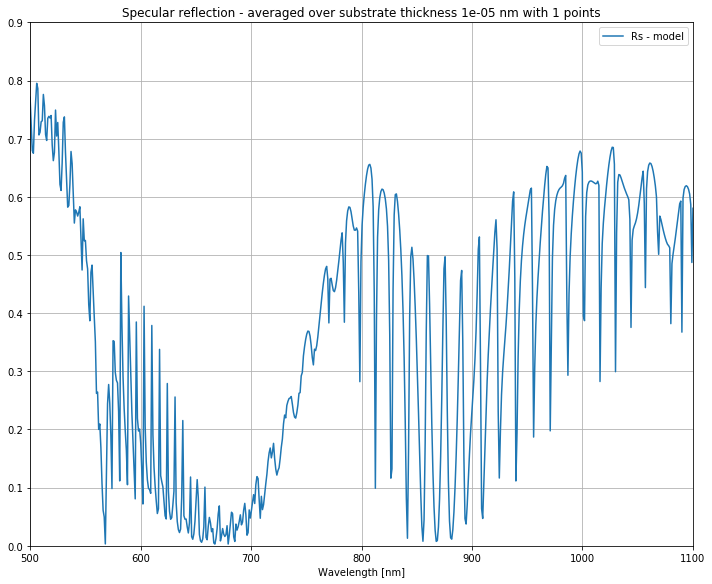

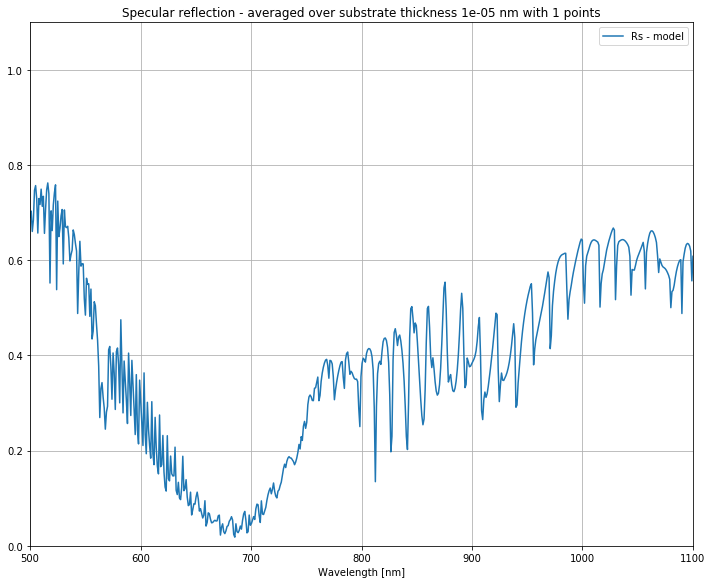

CPU times: user 2min 5s, sys: 918 ms, total: 2min 6s
Wall time: 1min 4s


In [28]:
%%time

def general_func_thickness(wvs, options_input, thickness):
    
    def get_structure_and_options(index):
        
        options = {
            'bound_selectors': [
                ['wavelength'],  # Select the proper attribute to be dependant
            ],
            'n_terms': 10,
            'n_select': 0,
            'wavelength': wvs[index],
            'angle': 0,
            'divisions': options_input['divisions'],
            'divisions_start': options_input['divisions_start'],
            'divisions_end': options_input['divisions_end'],
            'dependence': options_input['dependence']
        }

        fill_grating = 0.5
        
        width_grating = 530
        width_ref_vrstva = 20
       
        perm_substrate = 1.5**2
        perm_ref_vrstva = (1 - 6j)**2
        
        structure = {
            'bound_selectors': [
            ],
            'superstrate': 1,  # indexes, not perm
            'substrate': 1,
            'period': 1500,
            'data': [
                 {'width': width_ref_vrstva, 'periodic': True, 'coherent': True, 'materials': [
                    {'permittivity': [perm_ref_vrstva, 0, 0, 0, perm_ref_vrstva, 0, 0, 0,  perm_ref_vrstva], 'start': 0,
                     'stop': fill_grating},
                    {'permittivity': [1, 0, 0, 0, 1, 0, 0, 0, 1], 'start': fill_grating, 'stop': 1},
                ]},
                 {'width': width_grating-width_ref_vrstva, 'periodic': True, 'coherent': True, 'materials': [
                    {'permittivity': [perm_substrate, 0, 0, 0, perm_substrate, 0, 0, 0,  perm_substrate], 'start': 0,
                     'stop': fill_grating},
                    {'permittivity': [1, 0, 0, 0, 1, 0, 0, 0, 1], 'start': fill_grating, 'stop': 1},
                ]},
                {'width': width_ref_vrstva, 'periodic': True, 'coherent': True, 'materials': [
                    {'permittivity': [perm_substrate, 0, 0, 0, perm_substrate, 0, 0, 0,  perm_substrate], 'start': 0,
                     'stop': fill_grating},
                    {'permittivity': [perm_ref_vrstva, 0, 0, 0, perm_ref_vrstva, 0, 0, 0, perm_ref_vrstva], 'start': fill_grating, 'stop': 1},
                ]},
                {'width': thickness, 'periodic': False, 'coherent': True,
                 'permittivity': [ perm_substrate, 0, 0, 0,  perm_substrate, 0, 0, 0,  perm_substrate]},
                 
            ]}
        
        return options, structure


    def calculate_from_structure_and_options(index):
        options, structure = get_structure_and_options(index)
        coherent_subsystems = get_coherent_subsets(structure)
        
        for item in coherent_subsystems:
            item['toeplitz_matrix'] = calculate_toeplitz_matrices(item, options)
            # Ke kazde podstrukture pridam jeji vypocitanou s-matici
            item['s_matrix'] = calculate_s_matrix(item, options, item['toeplitz_matrix'])

        # Pomoci partial waves algorithm vypocitam vysledne koherencni matice
        coh_matrices = calculate_incoherent_partial_waves(coherent_subsystems, options)

        reflectance_s, reflectance_p, transmittance_s, transmittance_p, diff_angles = get_observables(coh_matrices,
                                                                                                      options, structure)
        # Z vypocitanych matic ziskam potrebne veliciny a vratim je
        return {'coefficients': np.array([reflectance_s, reflectance_p, transmittance_s, transmittance_p]),
                        'diff_angles': diff_angles, 'structure': structure}
    
    indexes = range(wvs.size)
    results = list(map(calculate_from_structure_and_options,indexes))
    

    return get_coeffs(np.array(results))[0]

def thickness_avg(thickness_diff, thickness_avg_points):
    list_thickness_avg = []
    weighted_points = np.linspace(-3*thickness_diff + 10000,3*thickness_diff + 10000, thickness_avg_points)
    weights = scipy.stats.norm.pdf(weighted_points,10000,thickness_diff)/scipy.stats.norm.pdf(weighted_points,10000,thickness_diff).sum()
    for x in range(thickness_avg_points):
        list_thickness_avg.append(weights[x]*general_func_thickness(wv_array, options_input, weighted_points[x]))
    
    rs_0 = np.empty((thickness_avg_points,len(wv_array)))
    rp_0 = np.empty((thickness_avg_points,len(wv_array)))
    ts_0 = np.empty((thickness_avg_points,len(wv_array)))
    tp_0 = np.empty((thickness_avg_points,len(wv_array)))

    for x in range(thickness_avg_points):
        rs_0[x] = list_thickness_avg[x][:,0,0]
        rp_0[x] = list_thickness_avg[x][:,1,0]
        ts_0[x] = list_thickness_avg[x][:,2,0]
        tp_0[x] = list_thickness_avg[x][:,3,0]
        
    
    plt.figure(15, figsize=(10, 10/6.75*5.55))
    plt.title("Specular reflection - averaged over substrate thickness " + str(thickness_diff) + ' nm with ' + str(thickness_avg_points) + ' points')
    plt.plot(wv_array, rs_0.sum(axis=0), label='Rs - model')
    #plt.plot(wv_array, rp_0.mean(axis=0) , 'b--', label='Rp - model')
    plt.axis([options_input['divisions_start'], options_input['divisions_end'], 0, 0.9])
    plt.xlabel(options_input['dependence']['label'])
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    #plt.show()
    
    #plt.figure(16, figsize=(10, 10/6.75*5.55))
    #plt.title("Specular reflection - averaged over substrate thickness " + str(thickness_diff) + ' nm with ' + str(thickness_avg_points) + ' points')
    #plt.plot(wv_array, (rs_0.sum(axis=0) + rp_0.sum(axis=0) + ts_0.sum(axis=0) + tp_0.sum(axis=0))/2, label='Rs - model')
    #plt.plot(wv_array, rp_0.mean(axis=0) , 'b--', label='Rp - model')
    #plt.axis([options_input['divisions_start'], options_input['divisions_end'], 0, 1.1])
    #plt.xlabel(options_input['dependence']['label'])
    #plt.legend(loc='upper right')
    #plt.grid(True)
    #plt.tight_layout()
    #plt.show()
    
    return rs_0.sum(axis=0), rp_0.sum(axis=0) ,ts_0.sum(axis=0) ,tp_0.sum(axis=0)

values_thickness_avg_0 = thickness_avg(0.00001, 1)
#values_thickness_avg_50 = thickness_avg(50, 5)
#values_thickness_avg_50 = thickness_avg(100, 10)
#values_thickness_avg_50 = thickness_avg(150, 15)
#values_thickness_avg_50 = thickness_avg(200, 20)
plt.show()

# Bandwidth

In [ ]:
%%time

def general_func_bandwidth(wvs, options_input, bandwidth, avg_points):
    
    def get_structure_and_options(wv):
        
        options = {
            'bound_selectors': [
                ['wavelength'],  # Select the proper attribute to be dependant
            ],
            'n_terms': 10,
            'n_select': 2,
            'wavelength': wv,
            'angle': 0,
            'divisions': options_input['divisions'],
            'divisions_start': options_input['divisions_start'],
            'divisions_end': options_input['divisions_end'],
            'dependence': options_input['dependence']
        }

        fill_grating = 0.5
        
        width_grating = 530
        width_ref_vrstva = 20
       
        perm_substrate = 1.5**2
        perm_ref_vrstva = (1 - 6j)**2
        
        structure = {
            'bound_selectors': [
            ],
            'superstrate': 1,  # indexes, not perm
            'substrate': 1,
            'period': 1500,
            'data': [
                 {'width': width_ref_vrstva, 'periodic': True, 'coherent': True, 'materials': [
                    {'permittivity': [perm_ref_vrstva, 0, 0, 0, perm_ref_vrstva, 0, 0, 0,  perm_ref_vrstva], 'start': 0,
                     'stop': fill_grating},
                    {'permittivity': [1, 0, 0, 0, 1, 0, 0, 0, 1], 'start': fill_grating, 'stop': 1},
                ]},
                 {'width': width_grating-width_ref_vrstva, 'periodic': True, 'coherent': True, 'materials': [
                    {'permittivity': [perm_substrate, 0, 0, 0, perm_substrate, 0, 0, 0,  perm_substrate], 'start': 0,
                     'stop': fill_grating},
                    {'permittivity': [1, 0, 0, 0, 1, 0, 0, 0, 1], 'start': fill_grating, 'stop': 1},
                ]},
                {'width': width_ref_vrstva, 'periodic': True, 'coherent': True, 'materials': [
                    {'permittivity': [perm_substrate, 0, 0, 0, perm_substrate, 0, 0, 0,  perm_substrate], 'start': 0,
                     'stop': fill_grating},
                    {'permittivity': [perm_ref_vrstva, 0, 0, 0, perm_ref_vrstva, 0, 0, 0, perm_ref_vrstva], 'start': fill_grating, 'stop': 1},
                ]},
                {'width': 10000, 'periodic': False, 'coherent': True,
                 'permittivity': [ perm_substrate, 0, 0, 0,  perm_substrate, 0, 0, 0,  perm_substrate]},
                 
            ]}
        
        return options, structure

    def calculate_from_structure_and_options(wv):
        options, structure = get_structure_and_options(wv)
        coherent_subsystems = get_coherent_subsets(structure)
        
        for item in coherent_subsystems:
            item['toeplitz_matrix'] = calculate_toeplitz_matrices(item, options)
            # Ke kazde podstrukture pridam jeji vypocitanou s-matici
            item['s_matrix'] = calculate_s_matrix(item, options, item['toeplitz_matrix'])

        # Pomoci partial waves algorithm vypocitam vysledne koherencni matice
        coh_matrices = calculate_incoherent_partial_waves(coherent_subsystems, options)

        reflectance_s, reflectance_p, transmittance_s, transmittance_p, diff_angles = get_observables(coh_matrices,
                                                                                                      options, structure)
        # Z vypocitanych matic ziskam potrebne veliciny a vratim je
        return {'coefficients': np.array([reflectance_s, reflectance_p, transmittance_s, transmittance_p]),
                        'diff_angles': diff_angles, 'structure': structure}
    
    def bandwidth_avg(wv):
        list_avg = []
        for x in np.random.normal(wv, bandwidth, avg_points):
            list_avg.append(calculate_from_structure_and_options(x))
 
        
        rs_0 = np.empty(avg_points)
        rp_0 = np.empty(avg_points) 

        for x in range(avg_points):
            rs_0[x] = list_avg[x]['coefficients'][0,0]
            rp_0[x] = list_avg[x]['coefficients'][1,0]
        return rs_0.mean(axis=0), rp_0.mean(axis=0)
    
    return list(map(bandwidth_avg,wv_array))

def calc_bandwidth(bandwidth, avg_points):
    values_bandwidth_avg = np.array(general_func_bandwidth(wv_array,options_input, bandwidth, avg_points))
    fig3 = plt.figure(15, figsize=(6.75, 5.55))
    plt.title("Specular reflection - averaged over bandwidth " + str(bandwidth) + ' nm with ' + str(avg_points) + ' points' )
    plt.plot(wv_array, values_bandwidth_avg[:,0], 'r--', label='Rs - model')
    plt.plot(wv_array, values_bandwidth_avg[:,1], 'b--', label='Rp - model')
    plt.axis([options_input['divisions_start'], options_input['divisions_end'], 0, 0.8])
    plt.xlabel(options_input['dependence']['label'])
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    return values_bandwidth_avg
    
values_bandwidth_1 = calc_bandwidth(1,30)
values_bandwidth_15 = calc_bandwidth(1.5,60)
values_bandwidth_2 = calc_bandwidth(2,90)

# Coherence length

/Users/premyslciompa/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/premyslciompa/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: ComplexWarning: Casting complex values to real discards the imaginary part


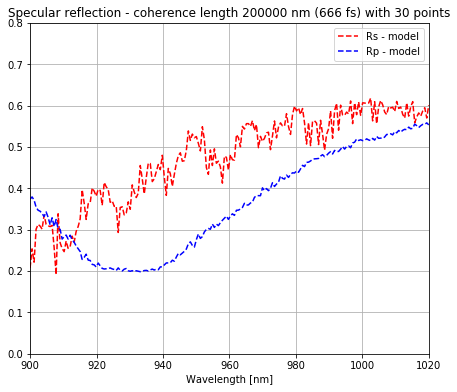

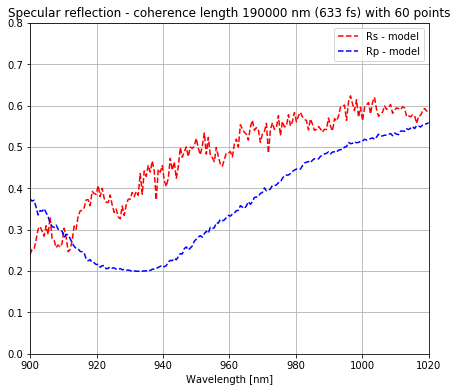

In [ ]:
%%time

def general_func_coherence_length(wvs, options_input, coherence_length, avg_points):
    
    def get_structure_and_options(wv):
        
        options = {
            'bound_selectors': [
                ['wavelength'],  # Select the proper attribute to be dependant
            ],
            'n_terms': 10,
            'n_select': 2,
            'wavelength': wv,
            'angle': 0,
            'divisions': options_input['divisions'],
            'divisions_start': options_input['divisions_start'],
            'divisions_end': options_input['divisions_end'],
            'dependence': options_input['dependence']
        }

        fill_grating = 0.5
        
        width_grating = 530
        width_ref_vrstva = 20
       
        perm_substrate = 1.5**2
        perm_ref_vrstva = (1 - 6j)**2
        
        structure = {
            'bound_selectors': [
            ],
            'superstrate': 1,  # indexes, not perm
            'substrate': 1,
            'period': 1500,
            'data': [
                 {'width': width_ref_vrstva, 'periodic': True, 'coherent': True, 'materials': [
                    {'permittivity': [perm_ref_vrstva, 0, 0, 0, perm_ref_vrstva, 0, 0, 0,  perm_ref_vrstva], 'start': 0,
                     'stop': fill_grating},
                    {'permittivity': [1, 0, 0, 0, 1, 0, 0, 0, 1], 'start': fill_grating, 'stop': 1},
                ]},
                 {'width': width_grating-width_ref_vrstva, 'periodic': True, 'coherent': True, 'materials': [
                    {'permittivity': [perm_substrate, 0, 0, 0, perm_substrate, 0, 0, 0,  perm_substrate], 'start': 0,
                     'stop': fill_grating},
                    {'permittivity': [1, 0, 0, 0, 1, 0, 0, 0, 1], 'start': fill_grating, 'stop': 1},
                ]},
                {'width': width_ref_vrstva, 'periodic': True, 'coherent': True, 'materials': [
                    {'permittivity': [perm_substrate, 0, 0, 0, perm_substrate, 0, 0, 0,  perm_substrate], 'start': 0,
                     'stop': fill_grating},
                    {'permittivity': [perm_ref_vrstva, 0, 0, 0, perm_ref_vrstva, 0, 0, 0, perm_ref_vrstva], 'start': fill_grating, 'stop': 1},
                ]},
                {'width': 10000, 'periodic': False, 'coherent': True,
                 'permittivity': [ perm_substrate, 0, 0, 0,  perm_substrate, 0, 0, 0,  perm_substrate]},
                 
            ]}
        
        return options, structure

    def calculate_from_structure_and_options(wv):
        options, structure = get_structure_and_options(wv)
        coherent_subsystems = get_coherent_subsets(structure)
        
        for item in coherent_subsystems:
            item['toeplitz_matrix'] = calculate_toeplitz_matrices(item, options)
            # Ke kazde podstrukture pridam jeji vypocitanou s-matici
            item['s_matrix'] = calculate_s_matrix(item, options, item['toeplitz_matrix'])

        # Pomoci partial waves algorithm vypocitam vysledne koherencni matice
        coh_matrices = calculate_incoherent_partial_waves(coherent_subsystems, options)

        reflectance_s, reflectance_p, transmittance_s, transmittance_p, diff_angles = get_observables(coh_matrices,
                                                                                                      options, structure)
        # Z vypocitanych matic ziskam potrebne veliciny a vratim je
        return {'coefficients': np.array([reflectance_s, reflectance_p, transmittance_s, transmittance_p]),
                        'diff_angles': diff_angles, 'structure': structure}
    
    def bandwidth_avg(wv):
        list_avg = []
        for x in np.random.normal(wv, wv**2/coherence_length, avg_points):
            list_avg.append(calculate_from_structure_and_options(x))
 
        
        rs_0 = np.empty(avg_points)
        rp_0 = np.empty(avg_points) 

        for x in range(avg_points):
            rs_0[x] = list_avg[x]['coefficients'][0,0]
            rp_0[x] = list_avg[x]['coefficients'][1,0]
        return rs_0.mean(axis=0), rp_0.mean(axis=0)
    
    return list(map(bandwidth_avg,wv_array))

def calc_coherence_length(coherence_length, avg_points):
    values_bandwidth_avg = np.array(general_func_coherence_length(wv_array,options_input, coherence_length, avg_points))
    fig3 = plt.figure(15, figsize=(6.75, 5.55))
    plt.title("Specular reflection - coherence length " + str(coherence_length) + ' nm (' + str(math.floor(coherence_length/300)) + ' fs) with ' + str(avg_points) + ' points' )
    plt.plot(wv_array, values_bandwidth_avg[:,0], 'r--', label='Rs - model')
    plt.plot(wv_array, values_bandwidth_avg[:,1], 'b--', label='Rp - model')
    plt.axis([options_input['divisions_start'], options_input['divisions_end'], 0, 0.8])
    plt.xlabel(options_input['dependence']['label'])
    plt.legend(loc='upper right') 
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    return values_bandwidth_avg
    
values_coherence_1 = calc_coherence_length(200000,30)
values_coherence_1 = calc_coherence_length(190000,60)
values_coherence_1 = calc_coherence_length(180000,90)

# Incoherent

/Users/premyslciompa/miniconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


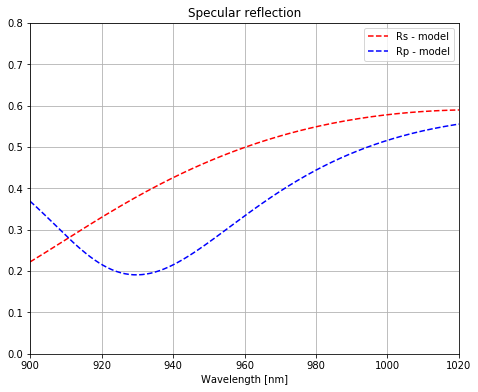

CPU times: user 49.3 s, sys: 393 ms, total: 49.7 s
Wall time: 25.2 s


In [9]:
%%time

def general_func_temp_incoh(wvs, options_input, angle):
    
    def get_structure_and_options(index):
        
        options = {
            'bound_selectors': [
                ['wavelength'],  # Select the proper attribute to be dependant
            ],
            'n_terms': 10,
            'n_select': 2,
            'wavelength': wvs[index],
            'angle': angle,
            'divisions': options_input['divisions'],
            'divisions_start': options_input['divisions_start'],
            'divisions_end': options_input['divisions_end'],
            'dependence': options_input['dependence']
        }

        fill_grating = 0.5
        
        width_grating = 530
        width_ref_vrstva = 20
       
        perm_substrate = 1.5**2
        perm_ref_vrstva = (1 - 6j)**2
        
        structure = {
            'bound_selectors': [
            ],
            'superstrate': 1,  # indexes, not perm
            'substrate': 1,
            'period': 1500,
            'data': [
                 {'width': width_ref_vrstva, 'periodic': True, 'coherent': True, 'materials': [
                    {'permittivity': [perm_ref_vrstva, 0, 0, 0, perm_ref_vrstva, 0, 0, 0,  perm_ref_vrstva], 'start': 0,
                     'stop': fill_grating},
                    {'permittivity': [1, 0, 0, 0, 1, 0, 0, 0, 1], 'start': fill_grating, 'stop': 1},
                ]},
                 {'width': width_grating-width_ref_vrstva, 'periodic': True, 'coherent': True, 'materials': [
                    {'permittivity': [perm_substrate, 0, 0, 0, perm_substrate, 0, 0, 0,  perm_substrate], 'start': 0,
                     'stop': fill_grating},
                    {'permittivity': [1, 0, 0, 0, 1, 0, 0, 0, 1], 'start': fill_grating, 'stop': 1},
                ]},
                {'width': width_ref_vrstva, 'periodic': True, 'coherent': True, 'materials': [
                    {'permittivity': [perm_substrate, 0, 0, 0, perm_substrate, 0, 0, 0,  perm_substrate], 'start': 0,
                     'stop': fill_grating},
                    {'permittivity': [perm_ref_vrstva, 0, 0, 0, perm_ref_vrstva, 0, 0, 0, perm_ref_vrstva], 'start': fill_grating, 'stop': 1},
                ]},
                {'width': 10000, 'periodic': False, 'coherent': False,
                 'permittivity': [ perm_substrate, 0, 0, 0,  perm_substrate, 0, 0, 0,  perm_substrate]},
                 
            ]}
        
        return options, structure

    def calculate_from_structure_and_options(index):
        options, structure = get_structure_and_options(index)
        coherent_subsystems = get_coherent_subsets(structure)
        
        for item in coherent_subsystems:
            item['toeplitz_matrix'] = calculate_toeplitz_matrices(item, options)
            # Ke kazde podstrukture pridam jeji vypocitanou s-matici
            item['s_matrix'] = calculate_s_matrix(item, options, item['toeplitz_matrix'])

        # Pomoci partial waves algorithm vypocitam vysledne koherencni matice
        coh_matrices = calculate_incoherent_partial_waves(coherent_subsystems, options)

        reflectance_s, reflectance_p, transmittance_s, transmittance_p, diff_angles = get_observables(coh_matrices,
                                                                                                      options, structure)
        # Z vypocitanych matic ziskam potrebne veliciny a vratim je
        return {'coefficients': np.array([reflectance_s, reflectance_p, transmittance_s, transmittance_p]),
                        'diff_angles': diff_angles, 'structure': structure}
    
    indexes = range(wvs.size)
    results = list(map(calculate_from_structure_and_options,indexes))
    

    return get_coeffs(np.array(results))[0]

options_input = {
    'divisions': wv_array.size,
    'divisions_start': wv_array[0],
    'divisions_end': wv_array[-1],
    'dependence': {
        'name': 'wavelength',  ##angle // wavelength // structure
        'label': 'Wavelength [nm]'
    }
}

values_incoherent = general_func_temp_incoh(wv_array, options_input, 0)

fig3 = plt.figure(15, figsize=(6.75, 5.55))
plt.title("Specular reflection")
plt.plot(wv_array, values_incoherent[:,0,0], 'r--', label='Rs - model')
plt.plot(wv_array, values_incoherent[:,1,0], 'b--', label='Rp - model')
plt.axis([options_input['divisions_start'], options_input['divisions_end'], 0, 0.8])
plt.xlabel(options_input['dependence']['label'])
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()